# Лекция 5: Тестирование гипотез 2. Непараметрические критерии

In [ ]:
KS - в точности одинаковые распределения

*Подготовил: Ян Пиле*

В прошлый раз мы обсуждали параметрические критерии, то есть критерии, которые делают предположение о конкретном характере распределения вашей выборки и проверяют гипотезы о параметрах распределения из известного семейства. Но что делать, если Характер распределения нам неизвестен. Тут придется применять какие-то методы, не использующие дополнительных предположений. Хорошо, скажете вы, но есть же Центральная предельная теорема, которая при достаточном n и не слишком скошенном распределении умеет, например, проверять гипотезы о среднем. Да, вы правы. Но что если распределение скошено или выборка не слишком велика? Пусть , например, задача поставлена так:

**Выборка**    $X_n = {X_1 ... X_n}$ из неизвестного распределения $X \sim P$ и мы не знаем, что это за распределение.

Нужно проверить, отличается ли значимо среднее в выборке от нуля.

**Нулевая гипотеза**    $H_0: \bar{X} = 0$ 

**Альтернативная гипотеза**     $H_1: \bar{X} \not= 0$ 

**Статистика**    $T(X_n) = ? $

**Нулевое распределение**    $F(x) = ?$ - распределение статистики в случае справедливости $H_0$ (мы его не знаем)


В целом есть два варианта работы с такими задачами:

1) Можно сделать какое-то предположение (и обосновать его) о характере $F(x)$

2) Можно заменить исходную выборку другим объектом, о распределении которого мы что-то знаем.

#  Критерии знаков

Критерий знаков - непараметрический критерий, который позволяет проверять гипотезы равенства медианы какому-то наперед заданному значению (одновыборочный критерий знаков) или равенства нулю разности медиан в двух связанных выборках (критерий знаков для двух связанных выборок). 

**Плюсы:** Критерий не использует вообще никаких предположений о распределениях наших факторов и достаточно легок в вычислении.

**Минусы:** Эмпирически показано, что имеет меньшую мощность (вероятность ошибки 2 рода больше), чем другие, более специализированные критерии



# Одновыборочный критерий

Вы прогуливались по Таймс-скверу и решили поспрашивать у прохожих их годовую зарплату в долларах. Почти наверное такое распределение будет сильно скошено. Где-то вы слышали, что средняя зарплата в этом районе города около 50000 долларов в год. Вы получили следующие данные в ходе опроса:

In [1]:
salaries = [8478,21564,36562,176602,9395,18320,50000,2,40298,39,10780,2268583,3404930]

In [2]:
%pylab inline
from statsmodels.stats.weightstats import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


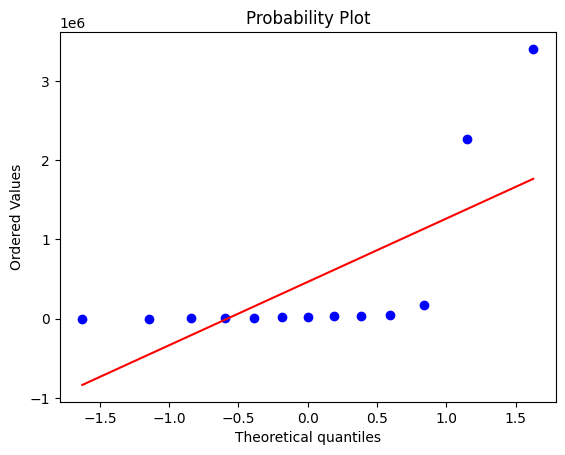

In [3]:
f = stats.probplot(salaries, dist="norm", plot=pylab)

Наши данные от нормальности весьма далеки.

**Выборка**    $X_n = {X_1 ... X_n}$ 

**Нулевая гипотеза**    $H_0: median(X) = M$

**Альтернативная гипотеза**     $H_1: median(X) \not= M$ (двусторонняя альтернатива)

**Статистика** $T(X_n) = \sum_i[X_i>M]$ Здесь $[]$- индикаторная функция (равна 1, если условие в скобках истинно и нулю в противном случае)

**Нулевое распределение** $T \sim Binomial(n,\dfrac{1}{2})$

In [4]:
from statsmodels.stats.descriptivestats import sign_test

In [5]:
sign_test(salaries, 50000)

(-3.0, 0.14599609375000003)

Нулевая гипотеза НЕ отвергается (По данным нельзя сказать, что 50000 - плохая оценка медианы).

# Критерий для двух связанных выборок

**Выборки**    $X_1^{n1} = {X_{11} ... X_{1n_1}}$ и выборка $X_2^{n2} = {X_{21} ... X_{2n_2}}$ 

**Нулевая гипотеза**    $H_0: P(X_1 > X_2) = \frac{1}{2}$

**Альтернативная гипотеза**     $H_1: P(X_1 > X_2) \not= \frac{1}{2}$ (Двусторонняя альтернатива)

**Статистика** $T(X_n) = \sum_i[X_{1i}> X_{2i}]$ Здесь $[]$- индикаторная функция (равна 1, если условие в скобках истинно и нулю в противном случае)

**Нулевое распределение** $T(X_1^{n1},X_2^{n2}) \sim Binomial(n,\dfrac{1}{2})$

Рассмотрим следующую задачу:
Пусть мы хотим сравнить то, как работают различные алгоритмы машинного обучения  . Воспользуемся [данными](https://github.com/catboost/benchmarks/tree/master/quality_benchmarks) о качестве работы популярного метода градиентного бустинга Catboost c тюнингом гиперпараметров. О методологии можно прочесть [Здесь](https://github.com/catboost/benchmarks/blob/master/quality_benchmarks/comparison_description.pdf). Качество работы измерено с помощью показателя LogLoss, о котором мы обязательно поговорим в следующем курсе, а сейчас лишь важно понимать, что чем он меньше, тем результат работы классификатора лучше. Проверим гипотезу о том, что "В среднем" LogLoss, который показывает другой алгоритм - LightGBM - больше, чем у Catboost.

Отдельно хочу подчеркнуть, что под "средним" здесь не подразумевается арифметическое среднее или медиана, как было в случае одной выборки. 

In [6]:
from bs4 import BeautifulSoup
import requests

In [7]:
url = BeautifulSoup(requests.get('https://github.com/catboost/benchmarks/tree/master/quality_benchmarks').text)

In [8]:
table = url.find_all('table')[0]

In [9]:
catboost, lightgbm, difference = [], [], []
for row in table.find_all('tr')[1:]:
    c = float(row.find_all('td')[2].text.split()[0])
    catboost.append(c)
    
    l = float(row.find_all('td')[4].text.split()[0])
    lightgbm.append(l)
    difference.append(l - c)



In [12]:
sign_test(difference)

(4.5, 0.00390625)

(array([1., 0., 2., 1., 2., 0., 2., 0., 0., 1.]),
 array([0.071795 , 0.1042483, 0.1367016, 0.1691549, 0.2016082, 0.2340615,
        0.2665148, 0.2989681, 0.3314214, 0.3638747, 0.396328 ]),
 <BarContainer object of 10 artists>)

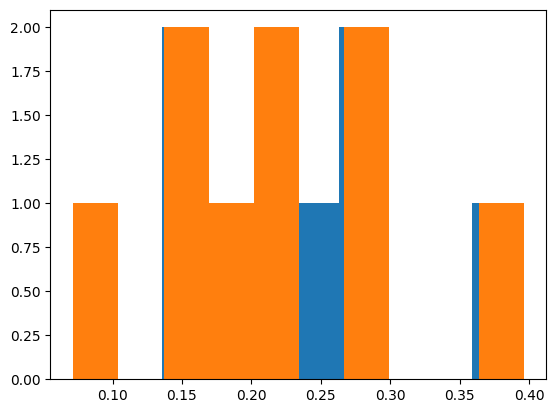

In [11]:
plt.hist(catboost)
plt.hist(lightgbm)

Критерий уверенно отвергает гипотезу о совпадении средних (В самом деле - Catboost почти везде победил)

Общий смысл того, что мы делали до сих пор – попытка превратить выборку из неизвестного нам распределения в бинарную.

# Критерии рангов

Превращая выборку в список бинарных величин мы , на самом деле, отбрасываем значительную часть информации, которая в выборке содержится (отсюда и снижение мощности критерия). Давайте попробуем сохранить еще какую-то часть информации о выборке, а именно – порядок следования элементов или ранг. Давайте превратим нашу выборку в вариационный ряд. 

Вариационным рядом мы будем называть отсортированную по неубыванию выборку. Например:

In [15]:
sample = [1,2,45,32,5, 32,5,6,66,6,5,4,3, 1000]

var_series =sorted(sample)

var_series

[1, 2, 3, 4, 5, 5, 5, 6, 6, 32, 32, 45, 66, 1000]

Рангом в вариационном ряде называется номер следования элемента (если элемент не находится в подпоследовательности, состоящей из одинаковых элементов). Например ранг единицы - 1, а ранг двойки - 2.
Если же элемент находится в подпоследовательности одинаковых элементов (как пятерка в нашем случае), то каждому из элементов этой подпоследовательности присваивается одинаковый ранг, который высчитывается как:

$$rank = \dfrac{rank(first\_element) + rank(last\_element)}{2}$$

То есть для всех пятерок в нашей выборке ранг равен $rank = \dfrac{5 + 7}{2} = 6$

## Критерий Манна-Уитни

**Выборки**    $X_1^{n1} = {X_{11} ... X_{1n_1}}$ и выборка $X_2^{n2} = {X_{21} ... X_{2n_2}}$ 

Часто говорят, что критерий проверяет гипотезу о сдвиге распределений, из которых взяты выборки друг относительно друга. По сути, это не совсем так.  Гипотезу часто формулируют как "выборки взяты из одного распределения". Здесь имеется в виду, что если взять вариационный ряд из двух выборок, значения из первой и второй выборок будут по нему равномерно рассеяны. Чем меньше значение критерия, тем вероятнее, что различия между значениями параметра в выборках достоверны. То есть:

**Нулевая гипотеза**: $F_{X_1} = F_{X_2}$ - значения из выборок равномерно рассеяны в вариационном ряде.

**Альтернативная гипотеза (двусторонняя альтернатива)**  $F_{X_1} \not= F_{X_2}$ - значения в какой-то из выборок рассеяны в вариационном ряде неравномерно.

Эту штуку трудно интерпретировать, но по смыслу если эти вероятности равны, то выборки "как бы" взяты из одного распределения с одними и теми же параметрами, а если нет, то нет.

**Статистика** Уложим обе наши выборки в один вариационный ряд. После чего подсчитаем сумму рангов, приходящуюся на элементы первой выборки ($R_1$) и на элементы  второй выборки ($R_2$). 

$$U_1 = n_1n_2 + \dfrac{n_2(n_2+1)}{2} - R_1$$

$$U_2 = n_1n_2 + \dfrac{n_1(n_1+1)}{2} - R_2$$

$$U = min(U_1, U_2)$$

**Нулевое распределение** Табличное, но есть нормальное приближение :)


## Нулевое распределение

Если выборки взяты из одного распределения, то каждый из рангов мог равновероятно реализоваться в первой или второй выборке. Всего вариантов реализаций рангов будет $C^{n1}_{n_1+n_2}$. Давайте переберем их все и на каждом из этих вариантов мы получим значение статистики Манна-Уитни. Удивительно, но уже при 10 объектах в каждой из выборок распределение критерия очень похоже на нормальное вот с такими параметрами:

$$R_1 \sim N(\dfrac{n_1(n_1+n_2+1)}{2},\dfrac{n_1n_2(n_1+n_2+1)}{12})$$

Например в известном нам пакете Scipy p-value для критерия Манна-Уитни именно с помощью его нормальной аппроксимации.

In [28]:
from scipy.stats import mannwhitneyu, ttest_ind
mannwhitneyu??

In [45]:
a = np.random.normal(0,1, size = (1000, 1000))
b = np.random.normal(0,5, size = (1000, 1000))

In [46]:
pval = [ttest_ind(a[i,:], b[i,:]).pvalue for i in range(1000)]

(array([ 95., 107.,  99., 105., 107.,  85.,  96., 113.,  92., 101.]),
 array([1.00232054e-04, 1.00004135e-01, 1.99908037e-01, 2.99811939e-01,
        3.99715842e-01, 4.99619744e-01, 5.99523647e-01, 6.99427549e-01,
        7.99331452e-01, 8.99235354e-01, 9.99139257e-01]),
 <BarContainer object of 10 artists>)

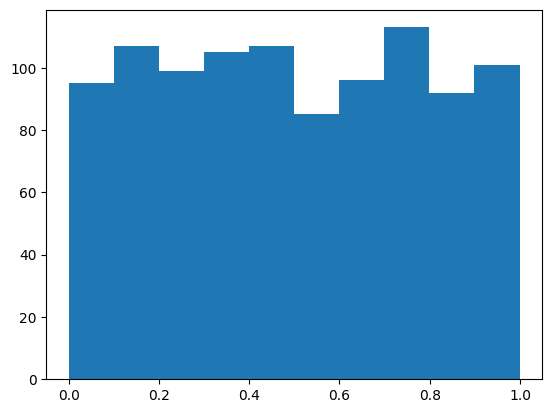

In [47]:
plt.hist(pval)

In [24]:
a = [-2]*20+[0]*20+[5]*20
b = [-1]*20+[0]*20+[10]*20

In [25]:
mannwhitneyu(a,b).pvalue

0.015481550512327179

(array([  8.,  37.,  87., 214., 253., 224., 122.,  44.,   9.,   2.]),
 array([-6.25857196, -4.88907469, -3.51957741, -2.15008014, -0.78058287,
         0.5889144 ,  1.95841168,  3.32790895,  4.69740622,  6.06690349,
         7.43640077]),
 <BarContainer object of 10 artists>)

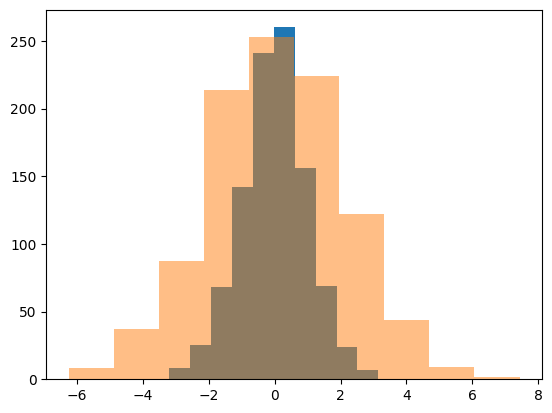

In [51]:
plt.hist(np.random.normal(0,1,1000))
plt.hist(np.random.normal(0,2,1000), alpha = 0.5)

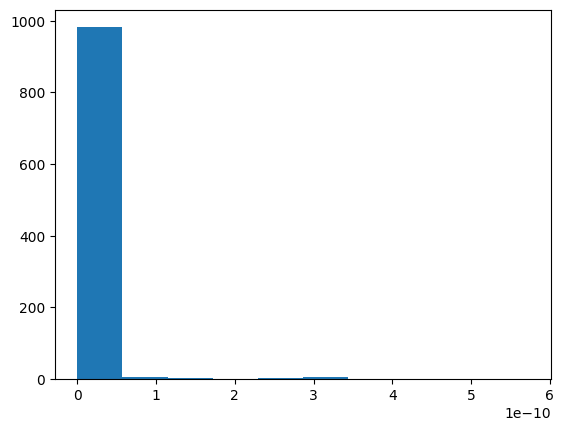

In [52]:
# тест колмогорова - смирнова
a = np.random.normal(0,1, size = (1000, 1000))
b = np.random.normal(0,2, size = (1000, 1000))
pval = [stats.ks_2samp(a[i,:], b[i,:]).pvalue for i in range(1000)]

_ = plt.hist(pval)

Я где-то слышал, что "быстрая" сортировка aka Quicksort хорошо работает на реальных данных. Кроме того, говорят, что не менее известная сортировка MergeSort тоже довольно хороша, причем даже для весьма плохих случаев. Не вдаваясь в особенности амортизационного анализа алгоритмов, давайте проведем эксперимент и измерим время работы алгоритмов Quicksort и MergeSort и проверим, что же быстрее работает на случайных данных.

Реализуем сортировку Quicksort. Как это работает можно посмотреть [здесь](https://www.youtube.com/watch?v=7h1s2SojIRw&t=366s). За опорную точку будем выбирать начальный элемент.

А MergeSort работает [так](https://www.youtube.com/watch?v=mB5HXBb_HY8).

Сравнивать наши результаты мы будем в предположении, что генератор случайных чисел в среднем создает списки, одинаково сложные для сортировки.

## Quicksort

In [146]:
def partition(array, start, end):
    pivot = start 
    for i in range(start+1, end+1):
        if array[i] <= array[start]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]
    array[pivot], array[start] = array[start], array[pivot]
    return pivot
 
def quick_sort(array, start=0, end=None):
    if end is None:
        end = len(array) - 1
    
    def _quicksort(array, start, end):
        if start >= end:
            return 
        pivot = partition(array, start, end)
        _quicksort(array, start, pivot-1)
        _quicksort(array, pivot+1, end)
    return _quicksort(array, start, end)

## MergeSort

In [147]:
def merge(left_list, right_list):  
    sorted_list = []
    left_list_index = right_list_index = 0

    # Длина списков часто используется, поэтому создадим переменные для удобства
    left_list_length, right_list_length = len(left_list), len(right_list)

    for _ in range(left_list_length + right_list_length):
        if left_list_index < left_list_length and right_list_index < right_list_length:
            # Сравниваем первые элементы в начале каждого списка
            # Если первый элемент левого подсписка меньше, добавляем его
            # в отсортированный массив
            if left_list[left_list_index] <= right_list[right_list_index]:
                sorted_list.append(left_list[left_list_index])
                left_list_index += 1
            # Если первый элемент правого подсписка меньше, добавляем его
            # в отсортированный массив
            else:
                sorted_list.append(right_list[right_list_index])
                right_list_index += 1

        # Если достигнут конец левого списка, элементы правого списка
        # добавляем в конец результирующего списка
        elif left_list_index == left_list_length:
            sorted_list.append(right_list[right_list_index])
            right_list_index += 1
        # Если достигнут конец правого списка, элементы левого списка
        # добавляем в отсортированный массив
        elif right_list_index == right_list_length:
            sorted_list.append(left_list[left_list_index])
            left_list_index += 1

    return sorted_list

def merge_sort(nums):  
    # Возвращаем список, если он состоит из одного элемента
    if len(nums) <= 1:
        return nums

    # Для того чтобы найти середину списка, используем деление без остатка
    # Индексы должны быть integer
    mid = len(nums) // 2

    # Сортируем и объединяем подсписки
    left_list = merge_sort(nums[:mid])
    right_list = merge_sort(nums[mid:])

    # Объединяем отсортированные списки в результирующий
    return merge(left_list, right_list)

In [148]:
from datetime import datetime as dt

quicksorted, mergesorted = [], []

for _ in range(400):
    l = list(np.random.rand(500))
    t0 = float(dt.utcnow().timestamp())
    f = quick_sort(l)
    t1 =  float(dt.utcnow().timestamp()) - t0
    quicksorted.append(t1)
    
for _ in range(400):
    l = list(np.random.rand(500))
    t0 = float(dt.utcnow().timestamp())
    f = merge_sort(l)
    t1 =  float(dt.utcnow().timestamp()) - t0
    mergesorted.append(t1)

In [149]:
import matplotlib.pyplot as plt

In [150]:
y, x = np.histogram(np.array(quicksorted), bins = 30)

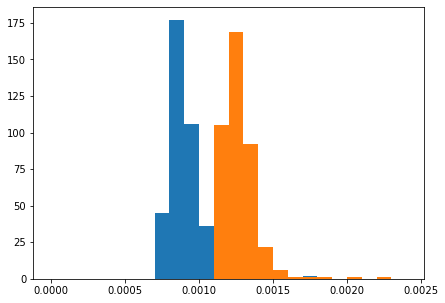

In [151]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(7,5))
hist = axs.hist(quicksorted, np.arange(0, max(quicksorted), 0.0001)) 
hist2 = axs.hist(mergesorted, np.arange(0, max(mergesorted), 0.0001), ) 
plt.show()

Вообще говоря, оба распределения не нормальные (Как минимум - они ограничены слева нулем). Поэтому чтобы протестировать значимость этого различия мы будем использовать критерий Манна-Уитни.

In [152]:
mannwhitneyu(quicksorted, mergesorted)

MannwhitneyuResult(statistic=6853.5, pvalue=2.9209886345199636e-111)

Критерий Манна-Уитни уверенно отвергает "равенство средних". На гистограмме мы видим, что перекрытие распределений (а соответственно и элементов вариационного ряда) много меньше, чем доля значений, изолированных друг от друга. Именно о том, что два распределения "раздвинуты" и говорит критерий.

In [54]:
import pandas as pd
df = pd.read_excel('/Users/i.pile/Downloads/data_ctr.xlsx')

In [57]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '3'}>],
      dtype=object)

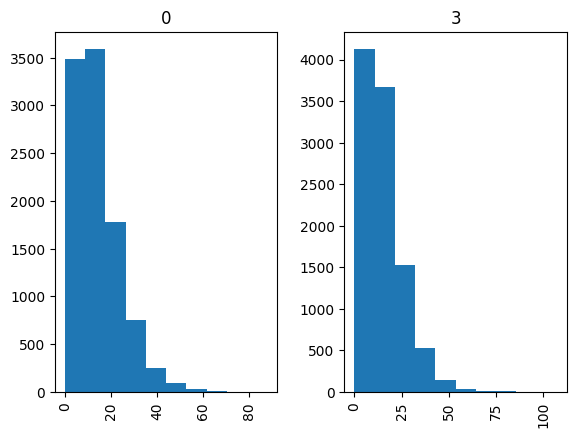

In [62]:
df.hist('likes', by = 'exp_group')

In [65]:
ttest_ind(df[df.exp_group == 0].likes , df[df.exp_group == 3].likes, equal_var = False)

Ttest_indResult(statistic=-6.707624593542688, pvalue=2.031079539958922e-11)

In [68]:
df_0 = df[df.exp_group == 0]
df_3 = df[df.exp_group == 3]

In [70]:
len(df_0), len(df_3)

(9999, 10049)

In [76]:
import numpy as np

In [80]:
b_0=np.random.choice(df_0.likes.to_numpy(), replace = True, size = (len(df_0), 1000))
b_3=np.random.choice(df_3.likes.to_numpy(), replace = True, size = (len(df_3), 1000))

In [90]:
import hashlib

In [98]:
def ab_split(id, salt='exp_mess_1', n_groups=50):
    test_id = str(id) + '-' + str(salt)
    test_id_digest = hashlib.md5(test_id.encode('ascii')).hexdigest()
    test_id_final_int = int(test_id_digest, 16)
    return test_id_final_int % n_groups

In [99]:
df['bucket'] = df['user_id'].apply(ab_split)

In [101]:
d = df.groupby(['exp_group','bucket'])['likes'].quantile(q= 0.9)

In [104]:
d = d.reset_index()

In [108]:
mannwhitneyu(d[d.exp_group == 0].likes, d[d.exp_group == 3].likes)

MannwhitneyuResult(statistic=759.5, pvalue=0.00034755372911083227)

In [109]:
ttest_ind(d[d.exp_group == 0].likes, d[d.exp_group == 3].likes, equal_var = False)

Ttest_indResult(statistic=-3.8556572288635627, pvalue=0.00020763761022867932)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.normal(0,1, size = 10000)

In [19]:
y = np.hstack([np.random.normal(10,1, size = 5000),np.random.normal(-10,1, size = 5000)])

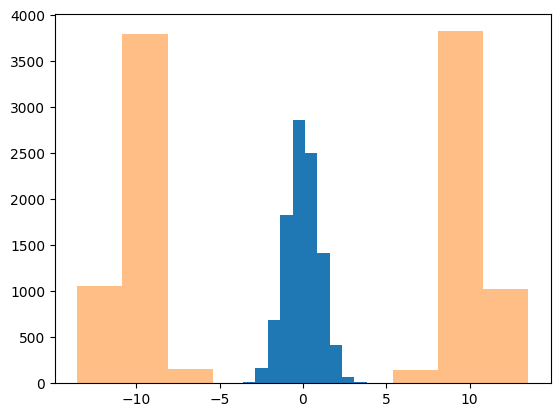

In [20]:
_ = plt.hist(x)
_ = plt.hist(y, alpha = 0.5)

In [21]:
from scipy.stats import mannwhitneyu, ttest_ind

In [23]:
mannwhitneyu(x,y)

MannwhitneyuResult(statistic=50000000.0, pvalue=0.4999995114097027)

In [26]:
from scipy.stats import pearsonr

In [28]:
xs = [0]*2000 + [1]*1000

In [29]:
ys = np.hstack([np.random.normal(2,3,size = 2000), np.random.normal(4,3,size = 1000)])

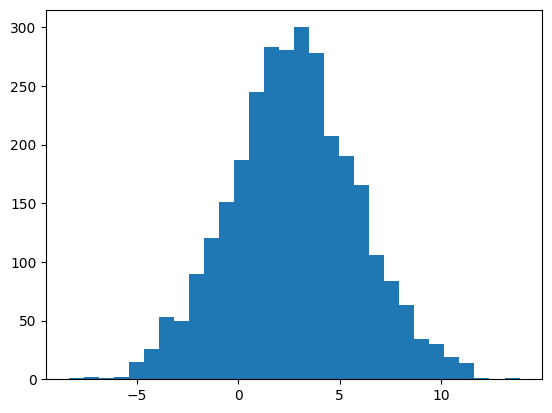

In [33]:
_ = plt.hist(ys, bins = 30)

In [34]:
pearsonr(ys,xs)

(0.3231781475303694, 6.914471148551752e-74)

In [36]:
import pandas as pd
df = pd.DataFrame()

In [37]:
df['x'] = xs
df['y'] = ys

In [42]:
df.hist??

In [47]:
df.groupby('x').mean()

,y
x,
0,2.025434
1,4.183102
